# Introduction to SQL
    
In Week 1 you cleaned the data obtained from `lacity.org` that recorded details on traffic accidents.  You prepped this data to load it into a SQL database. But what we will see as we continue to analyze the data, is that there is more cleaning that needs to happen.
    
## Deliverables:
- Submit two files that has the name <span style='color:red'><b> YourLastName_Assingment_2: </span></b>
    1. Your **HTML** file that has your Source code and output
    2. Your **ipynb script** that has your Source code and output
    
## Objectives:
In this exercise you will use data cleaned from Week 1 of our class:
- Load data from csv file into a DataFrame Object
- Analyze the data using SQL and Python
- Use sqlalchemy to load data stored in a DataFrame object into SQLite database engine
- Use sqlalchemy to connect to SQLite database engine to execute SQL queries
- Execute different SQL queries


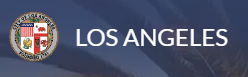

https://data.lacity.org/Public-Safety/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w

### Structured Query Language (SQL) versus Python

The discussion board this week has you comparing the use of SQL to a general purpose language like Python.  What you will be able to test out this week in the homework is the mixing/matching of using SQL and Python to analyze data.

In [1]:
# load libraries
import pandas as pd
import numpy as np
# https://docs.sqlalchemy.org/en/13/intro.html
import sqlalchemy
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# ------------------------------------------------------
# read in file from Week 1
# ------------------------------------------------------
df = pd.read_csv("Final Traffic.csv")

# check out fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549547 entries, 0 to 549546
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DR_Number           549547 non-null  int64  
 1   Date                549547 non-null  object 
 2   Division            549547 non-null  object 
 3   Reporting_District  549547 non-null  int64  
 4   Age                 549547 non-null  int64  
 5   Gender              549547 non-null  object 
 6   Descent             549547 non-null  object 
 7   Year                549547 non-null  int64  
 8   Month               549547 non-null  int64  
 9   Day                 549547 non-null  int64  
 10  Hour                549547 non-null  int64  
 11  imputeAge           549547 non-null  bool   
 12  Latitude            549547 non-null  float64
 13  Longitude           549547 non-null  float64
dtypes: bool(1), float64(2), int64(7), object(4)
memory usage: 55.0+ MB


In [3]:
# look at the first 5 records
df.head()

DR_Number        Date    Division  Reporting_District  Age  Gender  \
0  190319651  08/24/2019   Southwest                 356   22    Male   
1  190319680  08/30/2019   Southwest                 355   30  Female   
2  190413769  08/25/2019  Hollenbeck                 422   40    Male   
3  190127578  11/20/2019     Central                 128   21    Male   
4  190319695  08/30/2019   Southwest                 374   49    Male   

    Descent  Year  Month  Day  Hour  imputeAge  Latitude  Longitude  
0  Hispanic  2019      8   24     4      False   34.0255  -118.3002  
1  Hispanic  2019      8   30    23      False   34.0256  -118.3089  
2   Unknown  2019      8   25     5       True   34.0738  -118.2078  
3  Hispanic  2019     11   20     3      False   34.0492  -118.2391  
4     Black  2019      8   30    21      False   34.0108  -118.3182

### Load traffic data into a table in a SQLite database

- we are creating a database called `LAtraffic`
- we are creating a table called `traffic`


In [4]:
# 'engine' will be used to reference the database
engine = create_engine('sqlite:///LAtraffic.db')

df.to_sql('traffic', engine, if_exists = 'replace', index = False)
# check out columns in table
pd.read_sql_table('traffic', engine).columns

549547

Index(['DR_Number', 'Date', 'Division', 'Reporting_District', 'Age', 'Gender',
       'Descent', 'Year', 'Month', 'Day', 'Hour', 'imputeAge', 'Latitude',
       'Longitude'],
      dtype='object')

### Next read in the MO file we created earlier in the class and add to the database

- we are creating a table in the `LAtraffic` database called `MO_accident`

In [5]:
# specify that the codes column is a string, not an int so we don't lose leading zeros
mo = pd.read_csv("MO per accident.csv",dtype = {'MO_Codes':'str'})

mo.to_sql('MO_accident', engine, if_exists = 'replace', index = False)
# check out columns in table
pd.read_sql_table('MO_accident', engine).columns

3033153

Index(['DR_Number', 'MO_Codes'], dtype='object')

### Now read in a file that contains all MO codes and a description of what they mean

- we are creating a table in the `LAtraffic` database called `MO_master`

In [6]:
# specify that the codes column is a string, not an int so we don't lose leading zeros
mo_mast = pd.read_csv("MO master.csv", dtype = {'Codes':'str'})

mo_mast.to_sql('MO_master', engine, if_exists = 'replace', index = False)
# check out the columns
pd.read_sql_table('MO_master', engine).columns

777

Index(['Codes', 'Description'], dtype='object')

### You can see the three tables that are now saved into the `LAtraffic` database

In [7]:
from sqlalchemy import schema
xMetaData = schema.MetaData(bind = engine)
xMetaData.reflect()
# will show table names
xMetaData.tables.keys()

dict_keys(['MO_accident', 'MO_master', 'accidents_by_division', 'hw_q5', 'hw_q8_2019_df', 'hw_q8_2020_df', 'traffic'])

### Simple query using * to select all columns

- Clean, easy-to-read code has main query commands each on a new line (SELECT and FROM on separate lines)
- SELECT specifies the columns in a table
- FROM specifies the table name
- engine refers to the database named in the create_engine cell

In [8]:
# using pandas read_sql_query returns a dataframe
q1 = pd.read_sql_query("SELECT * \
                        FROM MO_accident", engine)
q1.head(10)

DR_Number MO_Codes
0  190319651     3036
1  190319651     3004
2  190319651     3026
3  190319651     3101
4  190319651     4003
5  190319680     3037
6  190319680     3006
7  190319680     3028
8  190319680     3030
9  190319680     3039

In [9]:
# same query, but you can choose to have query string separate
qstring = "SELECT * \
           FROM MO_accident"
q1a = pd.read_sql_query(qstring, engine)
q1a.head()

DR_Number MO_Codes
0  190319651     3036
1  190319651     3004
2  190319651     3026
3  190319651     3101
4  190319651     4003

In [10]:
# can use three single quotes and then no need for \ for line continuation
query = '''SELECT * 
           FROM MO_accident'''
q1b = pd.read_sql_query(query, engine)
q1b.head()

DR_Number MO_Codes
0  190319651     3036
1  190319651     3004
2  190319651     3026
3  190319651     3101
4  190319651     4003

### Using SELECT for specific fields

- can individually pull out specific fields

In [11]:
q2 = pd.read_sql_query("SELECT Division, Gender, Age \
                        FROM traffic", engine)
q2.head(10)

Division  Gender  Age
0   Southwest    Male   22
1   Southwest  Female   30
2  Hollenbeck    Male   40
3     Central    Male   21
4   Southwest    Male   49
5  Hollenbeck    Male   60
6      Harbor    Male   73
7   Southwest    Male   39
8   Southwest    Male   48
9  Hollenbeck    Male   68

### Can count and group the results

- `Count(*)` will count the rows that qualify
- `AS` allows you to rename the result to a more user friendly column name (in this example 'Accidents')
- `GROUP BY` is how the counts are accumulated - in this case by MO_Codes

**SQL Aggregate Functions**
- COUNT:  returns number of values in a specific column
- SUM: returns the sum of the values in a specific column
- AVG: returns the average of the values in a specific column
- MIN: returns the smallest value in a specific column
- MAX: returns the largest value in a specific column

In [12]:
# count of MO codes
q3 = pd.read_sql_query("SELECT MO_Codes, count(*) AS Accidents \
                        FROM MO_accident \
                        GROUP BY MO_Codes ", engine)
q3

MO_Codes  Accidents
0       0100          5
1       0101        943
2       0102         21
3       0103          6
4       0104          7
..       ...        ...
325     4024       4753
326     4025      35028
327     4026      80404
328     4027      56145
329     9999         12

[330 rows x 2 columns]

### ORDER BY will determine the output order

In [13]:
# count of MO codes
q4 = pd.read_sql_query("SELECT MO_Codes, count(*) AS Count \
                        FROM MO_accident \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q4

MO_Codes   Count
0       3101  402493
1       3701  327780
2       3401  327721
3       3004  242872
4       3037  212281
..       ...     ...
325     0316       1
326     0310       1
327     0309       1
328     0118       1
329     0112       1

[330 rows x 2 columns]

### Check out the MO_master table

In [14]:
# what is in the MO_master table?
query = "SELECT * \
         FROM MO_master"
q5 = pd.read_sql_query(query, engine)
q5.head(10)

Codes          Description
0  0100  Suspect Impersonate
1  0101           Aid victim
2  0102                Blind
3  0103             Crippled
4  0104             Customer
5  0105             Delivery
6  0106               Doctor
7  0107                  God
8  0108               Infirm
9  0109            Inspector

### Joining two tables using WHERE clause

- in the `WHERE` line below we are joining the **MO_accident** table with the **MO_master** table
- the two tables are being joined on the MO_Codes column of the MO_accident table and the Codes column of the MO_master table
- this type of join is called an Inner Join

<div>
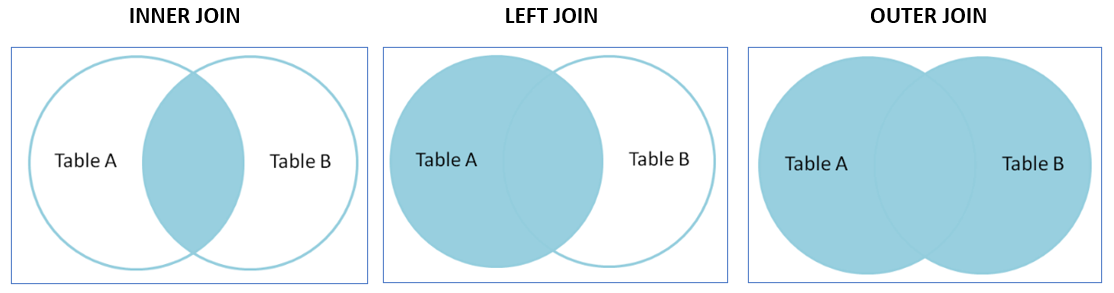
</div>


<div>
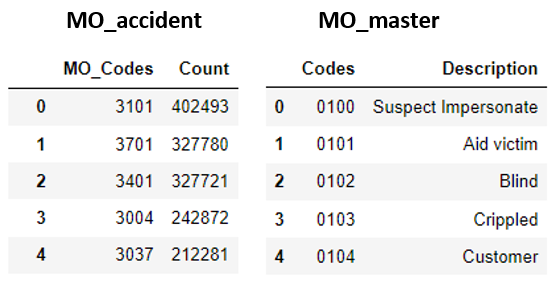
</div>


In [15]:
# look at MO codes with descriptions
q6 = pd.read_sql_query("SELECT MO_Codes, Description, count(*) AS Count \
                        FROM MO_accident a, MO_master m \
                        WHERE a.MO_Codes = m.Codes \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q6.head(20)

MO_Codes                                Description   Count
0      3101             T/C - PCF (A) In the Narrative  402493
1      3701         T/C - Movement Preceding Collision  327780
2      3401                    T/C - Type of Collision  327721
3      3004                           T/C - Veh vs Veh  242872
4      3037                 T/C - At Intersection - No  212281
5      3030                     T/C - Hit and Run Misd  184005
6      3028                       T/C - (N) Non Injury  149323
7      3026              T/C - (C) Complaint of Injury  133923
8      3036                T/C - At Intersection - Yes  116366
9      3006                    T/C - Veh vs Parked Veh  102339
10     3035          T/C - City Property Involved - No   95703
11     4026                 T/C - Valley Traffic (VTD)   80404
12     0605  Traffic Accident/Traffic related incident   69398
13     3025                   T/C - (B) Visible Injury   60061
14     4027                   T/C - West Traffic (WTD)   56145
15     3034         T/C - City Property Involved - Yes   53162
16     3029                      T/C - Hit and Run Fel   42572
17     4025                  T/C - South Traffic (STD)   35028
18     3003                           T/C - Veh vs Ped   30786
19     3011                  T/C - Veh vs Fixed Object   25579

### Using JOIN to connect two tables

In [16]:
# same query as above but using JOIN to connect the tables
q6a = pd.read_sql_query("SELECT Mo_Codes, Description, count(*) AS Count \
                        FROM MO_accident a \
                        JOIN MO_master m ON a.MO_Codes = m.Codes \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q6a.head(20)

MO_Codes                                Description   Count
0      3101             T/C - PCF (A) In the Narrative  402493
1      3701         T/C - Movement Preceding Collision  327780
2      3401                    T/C - Type of Collision  327721
3      3004                           T/C - Veh vs Veh  242872
4      3037                 T/C - At Intersection - No  212281
5      3030                     T/C - Hit and Run Misd  184005
6      3028                       T/C - (N) Non Injury  149323
7      3026              T/C - (C) Complaint of Injury  133923
8      3036                T/C - At Intersection - Yes  116366
9      3006                    T/C - Veh vs Parked Veh  102339
10     3035          T/C - City Property Involved - No   95703
11     4026                 T/C - Valley Traffic (VTD)   80404
12     0605  Traffic Accident/Traffic related incident   69398
13     3025                   T/C - (B) Visible Injury   60061
14     4027                   T/C - West Traffic (WTD)   56145
15     3034         T/C - City Property Involved - Yes   53162
16     3029                      T/C - Hit and Run Fel   42572
17     4025                  T/C - South Traffic (STD)   35028
18     3003                           T/C - Veh vs Ped   30786
19     3011                  T/C - Veh vs Fixed Object   25579

### Using WHERE to select a subset of data

- equals: =
- not equals: <> or != 
- is less than: <
- is greater than: >
- is less than or equal to: <= 
- is greater than or equal to: >=

In [17]:
# isolating 2010 data
q7 = pd.read_sql_query("SELECT Month, count(DR_Number) AS Count \
                        FROM traffic \
                        WHERE Year = 2010 \
                        GROUP BY Month \
                        ORDER BY Month", engine)
q7

Month  Count
0       1   3629
1       2   3440
2       3   3796
3       4   3621
4       5   3748
5       6   3575
6       7   3698
7       8   3618
8       9   3512
9      10   3977
10     11   3652
11     12   3990

### Logical Operators

- `AND`, `OR` and `NOT`
- Expressions are evaluated left to right
- Subexpressions in brackets are evaluated first
- NOT is evaluated before AND and OR
- AND is evaluated before OR

In [18]:
# isolating 2010 data along with Jan, Feb and March
q7a = pd.read_sql_query("SELECT Month, count(DR_Number) AS Count \
                        FROM traffic \
                        WHERE Year < 2011 AND Month < 4\
                        GROUP BY Month \
                        ORDER BY Month", engine)
q7a

Month  Count
0      1   3629
1      2   3440
2      3   3796

### BETWEEN and NOT BETWEEN

- Note that BETWEEN values are inclusive with month 1, 2, 3 and 4 qualifying with the query below.



In [19]:
# isolating 2010 data
q7b = pd.read_sql_query("SELECT Month, count(DR_Number) AS Count \
                         FROM traffic \
                         WHERE Year < 2011 AND Month BETWEEN 1 and 4\
                         GROUP BY Month \
                         ORDER BY Month", engine)
q7b

Month  Count
0      1   3629
1      2   3440
2      3   3796
3      4   3621

### IN and NOT IN

- Tests whether a data value matches one of a list of values
- Must be an exact match

In [20]:
q8 = pd.read_sql_query("SELECT Mo_Codes, Description, count(*) AS Count \
                        FROM MO_accident a, MO_master m \
                        WHERE a.MO_Codes = m.Codes AND \
                        Description IN ('T/C - Hit and Run Misd')\
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q8.head(20)

MO_Codes             Description   Count
0     3030  T/C - Hit and Run Misd  184005

### LIKE and NOT LIKE

- Searces for a string appearing somewhere within the data column

In [21]:
q9 = pd.read_sql_query("SELECT Mo_Codes, Description, count(*) AS Count \
                        FROM MO_accident a, MO_master m \
                        WHERE a.MO_Codes = m.Codes AND \
                        Description LIKE '%Hit%' \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q9.head(20)

MO_Codes                       Description   Count
0     3030            T/C - Hit and Run Misd  184005
1     3029             T/C - Hit and Run Fel   42572
2     0416                 Hit-Hit w/ weapon      78
3     1207                        Hitchhiker       1
4     0450  Suspect shot at victim (no hits)       1

### Let's use Latitutude and Longitude to do a quick analysis of accuracy of location data

### Cleaning data is iterative process

- the Latitude edges to Los Angeles appear to be 34.4 and 33.6
- the Longitude edges appear to be -118.7 and -118.1
- there are some outliers in our make shift map that need to be removed

In [22]:
z1 = pd.read_sql_query("SELECT Latitude, Longitude, Division \
                        FROM traffic", engine)
z1.head()


Latitude  Longitude    Division
0   34.0255  -118.3002   Southwest
1   34.0256  -118.3089   Southwest
2   34.0738  -118.2078  Hollenbeck
3   34.0492  -118.2391     Central
4   34.0108  -118.3182   Southwest

C:\Users\steve\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


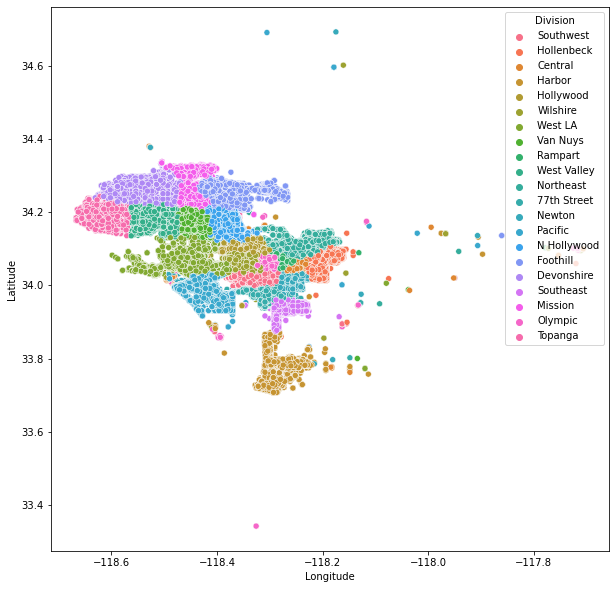

In [23]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.scatterplot(x = 'Longitude', y = 'Latitude', hue = "Division", data = z1, legend = 'full')

### The query below is selecting the data using SQL, but then using Python to summarize the findings

In [24]:
# query example used for homework requirement 1
q10 = pd.read_sql_query("SELECT Division \
                         FROM traffic", engine)

# now using python to summarize
q10['Division'].value_counts()

77th Street    37162
Southwest      32953
Wilshire       30340
N Hollywood    29169
Newton         28290
Olympic        28268
West LA        27761
Pacific        27653
Van Nuys       27646
Devonshire     27067
West Valley    26794
Hollywood      25865
Northeast      24732
Mission        24199
Southeast      24141
Topanga        23657
Central        22503
Harbor         20996
Rampart        20838
Hollenbeck     20037
Foothill       19476
Name: Division, dtype: int64

<div class="alert alert-block alert-warning">
    
## Requirements:
Answer the homework questions below.  Add cells as needed. Make sure all cells are run before you save to HTML.
</div>

<div class="alert alert-block alert-warning"> 
    <b> Requirement 1 : (5 points) </b> Using <b>SQL query only</b>, produce output similar to value_counts output that shows Division and the count for each division with the highest count shown first (see output for q10). 
    
   


</div>

In [25]:

hw_q1 = pd.read_sql_query("SELECT Division, count(DR_Number) AS Count \
                        FROM traffic \
                        GROUP BY Division \
                        ORDER BY Count DESC", engine)
hw_q1

Division  Count
0   77th Street  37162
1     Southwest  32953
2      Wilshire  30340
3   N Hollywood  29169
4        Newton  28290
5       Olympic  28268
6       West LA  27761
7       Pacific  27653
8      Van Nuys  27646
9    Devonshire  27067
10  West Valley  26794
11    Hollywood  25865
12    Northeast  24732
13      Mission  24199
14    Southeast  24141
15      Topanga  23657
16      Central  22503
17       Harbor  20996
18      Rampart  20838
19   Hollenbeck  20037
20     Foothill  19476

<div class="alert alert-block alert-warning"> 
<b> Requirement 2 : (5 points) </b>  Show the minimum, maximum and mean values for the Age column.  Do this only using <b>SQL</b>.
    
   


</div>

In [26]:
hw_q2 = pd.read_sql_query("SELECT MIN(Age) AS Minimum_Age, MAX(Age) AS Maximum_Age, AVG(Age) AS Mean_Age \
                        FROM traffic", engine)

hw_q2

Minimum_Age  Maximum_Age   Mean_Age
0           16           98  40.396983

<div class="alert alert-block alert-warning"> 
<b> Requirement 3 : (5 points) </b>  Find all Divisions with the word 'west' within the division title. Show the number of accidents in these Divisions.  Do this only using <b>SQL</b>. Sort with highest accident count showing on top.
    
   


</div>

In [27]:
hw_q3 = pd.read_sql_query("SELECT Division, count(*) AS Accidents \
                        FROM traffic \
                        WHERE Division LIKE '%west%' \
                        GROUP BY Division \
                        ORDER BY Accidents DESC", engine)
hw_q3



Division  Accidents
0    Southwest      32953
1      West LA      27761
2  West Valley      26794

<div class="alert alert-block alert-warning"> 
<b> Requirement 4: (10 points) </b> Let's analyze the accidents for teenagers, 16 to 19, and for the older group over 80.

1. Use SQL to select those in the age ranges described.
2. Based on percentage, how does the younger group differ from the older group by Gender? (Answer with Python)
3. Based on percentage, how does the younger group differ from the older group by Descent? (Answer with Python)
    
   


</div>

In [28]:
# Use SQL to select those in the age ranges described
hw_q4_df = pd.read_sql_query("SELECT *, CASE WHEN Age BETWEEN 16 AND 19 THEN 'Young' ELSE 'Old' END AS Age_Category \
                        FROM traffic \
                        WHERE (Age BETWEEN 16 AND 19) OR (Age > 80)", engine)

# Based on percentage, how does the younger group differ from the older group by gender?
gender_age = pd.crosstab(index=hw_q4_df["Age_Category"], columns=hw_q4_df["Gender"], margins = True)

gender_age_conditionals = round(gender_age.div(gender_age["All"], axis=0), 3)

gender_age_conditionals.applymap('{:.1%}'.format)



Gender       Female   Male  Other     All
Age_Category                             
Old           41.4%  58.4%   0.2%  100.0%
Young         19.2%  40.9%  39.9%  100.0%
All           27.2%  47.2%  25.6%  100.0%

The Los Angeles car accident data displays some differences between the teenager and over 80 years old population when disaggregated by gender.  The biggest difference is that 39.9% of accidents involving teenagers were reported as having drivers with "Other" as the gender, while only 0.2% of accidents involving individuals over 80 were reported as having drivers with "Other" as the gender.  A second difference is that teenage males caused over twice as many accidents as teenage females, but in the older age category, this difference across categories becomes less drastic with 41% of accidents caused by females and 58% of accidents caused by males.



In [29]:

# Based on percentage, how does the younger group differ from the older group by descent?
descent_age = pd.crosstab(index=hw_q4_df["Age_Category"], columns=hw_q4_df["Descent"], margins = True)

descent_age_conditionals = round(descent_age.div(descent_age["All"], axis=0), 3)

descent_age_conditionals.applymap('{:.1%}'.format)


Descent      Asian  Black Hispanic  Other Unknown  White     All
Age_Category                                                    
Old           8.8%  14.4%    14.5%  12.5%    1.7%  48.2%  100.0%
Young         1.4%   6.4%    25.5%  13.8%   44.3%   8.6%  100.0%
All           4.1%   9.3%    21.5%  13.3%   29.0%  22.8%  100.0%

The Los Angeles car accident data displays some differences between the teenager and over 80 years old population when disaggregated by descent.  One of the biggest differences is that 48.2% of accidents involving individuals over 80 were reported as having White drivers, while only 8.6% of accidents involving teenagers were reported as having White drivers.  A second big difference between the age classes is that 44.3% of accidents involving young people were reported as having drivers of unknown racial/ethnic descent, while only 1.7% of accidents involving individuals over 80 years old were reported as having drivers of unknown racial/ethnic descent.  While differences existed across age classes related to other racial/ethnic categories, those differences were not as strong. 

<div class="alert alert-block alert-warning"> 
<b> Requirement 5 : (5 points) </b> Let's do an analysis on Hit and Run accidents. We saw that there are two MO codes that represent Hit and Run - 3029 and 3030. 
   
1. Use SQL to query all accidents with codes 3029 or 3030 along with the Division where the accident occurred.   
2. Compare the top 5 Divisions in Requirement 1 that included all accidents to the top 5 Divisions with Hit and Run accidents. How do these differ?
    
   


</div>

In [30]:
# Use SQL to query all accidents with codes 3029 or 3030 along with the Division where the accident occurred
hw_q5 = pd.read_sql_query("SELECT t.DR_Number, t.Division, m.MO_Codes \
                        FROM traffic t  \
                        JOIN MO_accident m ON t.DR_Number = m.DR_Number \
                        WHERE (m.MO_Codes = 3029) OR (m.MO_Codes = 3030) ", engine)

hw_q5.to_sql('hw_q5', engine, if_exists = 'replace', index = False)

# Compare the top 5 Divisions in Requirement 1 that included all accidents to the top 5 DIVISIONS with Hit and Run 
# accidents.  How do these differ?

accidents_by_division = pd.read_sql_query("SELECT Division, COUNT(DR_Number) AS Accident_Count \
                                        FROM traffic  \
                                        GROUP BY Division \
                                        ORDER BY Accident_Count DESC ", engine)
accidents_by_division.head(5)

hit_and_run_by_division = pd.read_sql_query("SELECT Division, COUNT(DR_Number) AS Hit_And_Run_Count \
                                                FROM hw_q5  \
                                                GROUP BY Division \
                                                ORDER BY Hit_And_Run_Count DESC ", engine)
hit_and_run_by_division.head(5)

226577

Division  Accident_Count
0  77th Street           37162
1    Southwest           32953
2     Wilshire           30340
3  N Hollywood           29169
4       Newton           28290

Division  Hit_And_Run_Count
0  77th Street              16495
1    Southwest              13407
2       Newton              13189
3  N Hollywood              12166
4     Wilshire              12116

Interestingly, the divisions with the top 5 most accidents (77th Street, Southwest, Wilshire, N Hollywood, and Newton) are the exact same divisions with the top 5 most hit-and-runs.  In fact, 77th Street is the top division for both metrics, Southwest is has the second highest count for both of these metrics, and N Hollywood has the fourth highest count for both metrics.  The main way that the two top 5 division lists differ is just that Wilshire and Newton swap third and fifth place when moving from one list to the other.

<div class="alert alert-block alert-warning"> 
<b> Requirement 6 : (5 points) </b>  Use SQL to only select valid latititude and longitudes.  Once you have the data, use matplotlib to plot latitude, longitude and use the Division for hue.
    
- the Latitude edges to Los Angeles appear to be 34.4 and 33.6
- the Longitude edges appear to be -118.7 and -118.1
    
   


</div>

C:\Users\steve\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


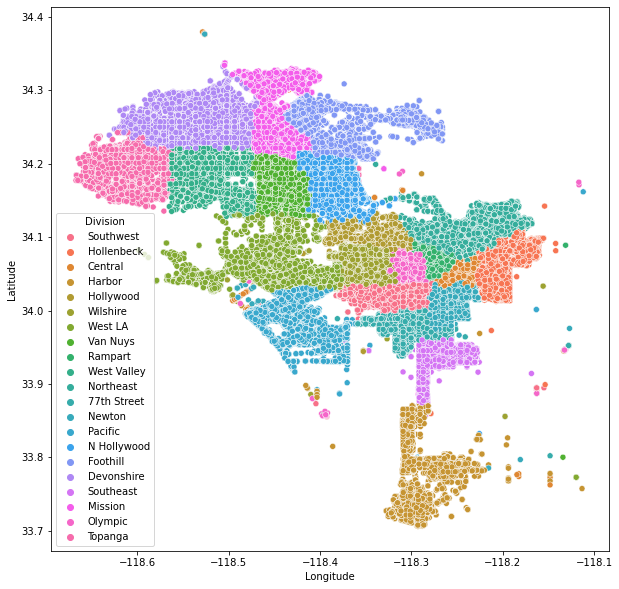

In [31]:
hw_q6 = pd.read_sql_query("SELECT Latitude, Longitude, Division \
                        FROM traffic \
                        WHERE (Latitude BETWEEN 33.6 AND 34.4) AND (Longitude BETWEEN -118.7 AND -118.1) ", engine)


fig, ax = plt.subplots(figsize = (10,10))
ax = sns.scatterplot(x = 'Longitude', y = 'Latitude', hue = "Division", data = hw_q6, legend = 'full')

<div class="alert alert-block alert-warning"> 
<b> Requirement 7: (5 points) </b>  Are the imputed records the same as the non-imputed records?  Select imputeAge, Gender and Descent.

- Compare Gender for imputeAge (imputed vs non-imputed records). Would you consider the imputed records to be similar to non-imputed in regards to Gender?
- Compare Descent for imputeAge (imputed vs non-imputed records). Would you consider the imputed records to be similar to non-imputed in regards to Descent?
    
   


</div>

In [32]:
# Select imputeAge, Gender and Descent.
hw_q7_df = pd.read_sql_query("SELECT imputeAge, Gender, Descent \
                        FROM traffic ", engine)

# Compare Gender for imputeAge (imputed vs non-imputed records). 
# Would you consider the imputed records to be similar to non-imputed in regards to Gender?
gender_ImputeAge = pd.crosstab(index=hw_q7_df["Gender"], columns=hw_q7_df["imputeAge"], margins = True)

gender_ImputeAge_conditionals = gender_ImputeAge/gender_ImputeAge.loc["All"]

gender_ImputeAge_conditionals.applymap('{:.1%}'.format)


imputeAge       0       1     All
Gender                           
Female      40.8%   22.2%   38.2%
Male        58.5%   62.7%   59.0%
Other        0.8%   15.1%    2.8%
All        100.0%  100.0%  100.0%

When comparing records with imputed and non-imputed genders in the Los Angeles traffic accident dataset, there appear to be differences in the gender distributions.  Specifically, 15% of the imputed driver genders are categorized as "other" while less than 1% of the non-imputed driver genders are categorized as "other."  Furthermore, 22% of the imputed driver genders are female, while nearly 41% of the non-imputed driver genders are female.  These findings underscore that ther appear to be differences in the gender distributions between the distributions of drivers with imputed and non-imputed driver genders.

In [33]:
# Compare Descent for imputeAge (imputed vs non-imputed records). 
# Would you consider the imputed records to be similar to non-imputed in regards to Descent?
descent_ImputeAge = pd.crosstab(index=hw_q7_df["Descent"], columns=hw_q7_df["imputeAge"], margins = True)

descent_ImputeAge_conditionals = descent_ImputeAge/descent_ImputeAge.loc["All"]

descent_ImputeAge_conditionals.applymap('{:.1%}'.format)


imputeAge       0       1     All
Descent                          
Asian        5.7%    1.6%    5.1%
Black       14.9%    5.7%   13.6%
Hispanic    39.8%   28.0%   38.2%
Other       12.7%   24.6%   14.3%
Unknown      2.4%   22.1%    5.2%
White       24.5%   18.0%   23.6%
All        100.0%  100.0%  100.0%

When comparing records with imputed and non-imputed racial/ethnic descents in the Los Angeles traffic accident dataset, there appear to be slight differences in the descent distributions.  Specifically, 46.7% of the imputed driver descents are categorized as either "other" or "unknown" while only 15.1% of the non-imputed driver descents are categorized as either "other" or "unknown."  For the other descent categories (Asian, Black, Hispanic, and White), the differences between the imputed and non-imputed conditional distributions are less strong.  These findings suggest that for some (but not all) of the descent categories, there exist strong differences between the imputed and non-imputed driver descent distributions.

<div class="alert alert-block alert-warning"> 
<b> Requirement 8: (15 points) </b>  Have hit and run accidents increased or decreased over time?  Is the change over time the same in all Districts?

1. Select only non-imputed rows for both types of Hit and Run accidents that occurred 2010-2020.
2. Show the count of accidents for each District for every year.  How you show the data is up to you.
3. In a Markdown cell, explain if the data is showing you that Hit and Run accidents are mosting increasing or decreasing in different districts?  Which districts saw increases in 2020 over previous year?
4. In a Markdown cell, explain what you see with 2010 and 2011 and suggest what can be done with these years?
   
</div>

In [34]:
# Select only non-imputed rows for both types of Hit and Run accidents that occurred 2010-2020.
hw_q8_df = pd.read_sql_query("SELECT t.Year, t.Division, COUNT(t.DR_Number) AS Hit_And_Run_Accident_Count \
                        FROM traffic t \
                        JOIN MO_accident m ON t.DR_Number = m.DR_Number \
                        WHERE (t.imputeAge = False) AND (t.Year BETWEEN 2010 AND 2020) AND (m.MO_Codes IN (3029, 3030)) \
                        GROUP BY Year, Division", engine)

# Show the count of accidents for each District for every year. How you show the data is up to you.
import plotly.express as px

fig = px.line(hw_q8_df, x = "Year", y = "Hit_And_Run_Accident_Count", color = "Division",
             title = "LA Hit-And-Run Accident Counts By Year and Division", color_discrete_sequence = px.colors.qualitative.Bold)

fig.update_layout(height = 600, xaxis_title = 'Year', yaxis_title = "Hit-And-Run Accident Count")

# Determine which districts saw increases in hit-and-run accidents in 2020 over the previous year
hw_q8_2019_df = pd.read_sql_query("SELECT t.Division, COUNT(t.DR_Number) AS Hit_And_Run_Accident_Count_2019 \
                        FROM traffic t \
                        JOIN MO_accident m ON t.DR_Number = m.DR_Number \
                        WHERE (t.imputeAge = False) AND (t.Year = 2019) AND (m.MO_Codes IN (3029, 3030)) \
                        GROUP BY Division ", engine)

hw_q8_2019_df.to_sql('hw_q8_2019_df', engine, if_exists = 'replace', index = False)


hw_q8_2020_df = pd.read_sql_query("SELECT t.Division, COUNT(t.DR_Number) AS Hit_And_Run_Accident_Count_2020 \
                        FROM traffic t \
                        JOIN MO_accident m ON t.DR_Number = m.DR_Number \
                        WHERE (t.imputeAge = False) AND (t.Year = 2020) AND (m.MO_Codes IN (3029, 3030)) \
                        GROUP BY Division ", engine)

hw_q8_2020_df.to_sql('hw_q8_2020_df', engine, if_exists = 'replace', index = False)


hw_q8_2019_2020_df = pd.read_sql_query("SELECT a.Division, a.Hit_And_Run_Accident_Count_2019, b.Hit_And_Run_Accident_Count_2020 \
                        FROM hw_q8_2019_df a \
                        JOIN hw_q8_2020_df b ON a.Division = b.Division \
                        WHERE (Hit_And_Run_Accident_Count_2019 < Hit_And_Run_Accident_Count_2020)  ", engine)

hw_q8_2019_2020_df



21

21

Division  Hit_And_Run_Accident_Count_2019  \
0  77th Street                             2017   
1    Southeast                             1173   

   Hit_And_Run_Accident_Count_2020  
0                             2191  
1                             1325

##### In a Markdown cell, explain if the data is showing you that Hit and Run accidents are mosting increasing or decreasing in different districts? Which districts saw increases in 2020 over previous year?

The graph above displays that the long-term trends of hit-and-run accidents in all divisions in Los Angeles are increasing.  

Notably, though, the hit-and-run accidents actually decreased in most divisions between 2019 and 2020 (despite the long-term, increasing trend).  This decrease in 2020 may be attributable to changes in behavior associated with the COVID-19 pandemic.  It could be interesting to continue monitoring this data in subsequent years to determine whether this temporary decrease turns into a long-term downward trend in hit-and-runs or whether the increasing trend returns over the long-term.

In fact, only two divisions experienced increases in hit-and-run accident counts between 2019 and 2020: 1) 77th Street and 2) Southeast.

##### In a Markdown cell, explain what you see with 2010 and 2011 and suggest what can be done with these years?

Notably, the trendlines above also display uncharacteristically low numbers in 2010 and 2011 compared to the rest of the dataset.  Acccordingly, further investigation into the data quality in those years may be warranted in order to determine the root cause of this finding.  If I were investigating the quality of the 2010 and 2011 data, some analyses I would likely pursue would be:
* First, I would determine whether the overall overall accident trend follows a similar trajectory.  If the accident trend looked more uniform across all years than the hit-and-run trend does (due to 2010 and 2011 hit-and-run count outliers), then that might suggest that certain divisions were coding accidents with different MO codes in 2010 and 2011.
* Second, I would investigate whether many ages had to be imputed in 2010 and 2011 compared to the other years.  If so, that finding might suggest that many hit-and-run accidents from 2010 and 2011 might have been eliminated from the above analysis since we removed all traffic accidents where the driver age had been imputed.
* Third, I might take a closer look at hit-and-run and accident counts disaggregated by month, year, and division in 2010 and 2011.  Perhaps, such an analysis might show that officials did not begin collecting traffic accident data until part of the way through 2010 or 2011 in some divisions.
* Fourth, if none of the analyses above yielded potential explanations, I might reach out to the individuals responsible for recording and entering data into this dataframe.  Those individuals might have insights into legacy processes that may have resulted in the unusual data in 2010 and 2011.

After conducting these analyses I would take the appropriate steps to handle / transform / clean the data as needed in order to address the root cause ahead of subsequent data analyses.


<div class="alert alert-block alert-warning"> 
<b> Requirement 9: (5 points) </b>  We haven't looked yet at Ages of drivers across the years.  Are these complete enough to do an Age analysis?
   
1. Select for all accidents types.
2. Show Age counts for each year.
    

</div>

In [35]:

# Display the traffic counts disaggregated by year and driver age.
hw_q9_df = pd.read_sql_query("SELECT Year, Age, COUNT(DR_Number) AS Accident_Count \
                                        FROM traffic  \
                                        GROUP BY Year, Age \
                                        ORDER BY Year, Age ", engine)

hw_q9_crosstab = pd.crosstab(index=hw_q9_df["Year"], columns=hw_q9_df["Age"], margins = True, aggfunc = 'sum', values = hw_q9_df["Accident_Count"])

hw_q9_nulls = hw_q9_crosstab.isna().sum().sum()

hw_q9_crosstab.fillna(0)

print(f"When creating a two-way table describing accident counts disaggregated by driver age and year, there are {hw_q9_nulls} age-year combinations for which there were zero such traffic accidents.")


# Consolidate the age variable into age categories.  Display the traffic counts disaggregated by year and age category.
hw_q9_df_2 = pd.read_sql_query("SELECT Year, Age, \
                                        CASE WHEN Age <=20 THEN '20 and under' \
                                        WHEN Age BETWEEN 21 AND 30 THEN '21 - 30' \
                                        WHEN Age BETWEEN 31 AND 40 THEN '31 - 40' \
                                        WHEN Age BETWEEN 41 AND 50 THEN '41 - 50' \
                                        WHEN Age BETWEEN 51 AND 60 THEN '51 - 60' \
                                        WHEN Age BETWEEN 61 AND 70 THEN '61 - 70' \
                                        WHEN Age BETWEEN 71 AND 80 THEN '71 - 80' \
                                        WHEN Age BETWEEN 81 AND 90 THEN '81 - 90' \
                                        WHEN Age >= 91 THEN '91 and over' \
                                        ELSE 'Unknown' END AS Age_Category \
                                        FROM traffic  \
                                        GROUP BY Year, Age \
                                        ORDER BY Year, Age ", engine)

hw_q9_crosstab_2 = pd.crosstab(index=hw_q9_df_2["Year"], columns=hw_q9_df_2["Age_Category"], margins = True, aggfunc = 'sum', values = hw_q9_df["Accident_Count"])

hw_q9_nulls_2 = hw_q9_crosstab_2.isna().sum().sum()

hw_q9_crosstab_2.fillna(0)

print(f"When creating a two-way table describing accident counts disaggregated by driver age category and year, there are {hw_q9_nulls_2} age category - year combinations for which there are zero such traffic accidents.")


Age      16     17      18      19       20       21       22       23  \
Year                                                                     
2010    1.0    0.0     1.0     1.0    887.0    938.0   1021.0   1045.0   
2011    0.0    0.0     0.0     0.0    940.0   1017.0   1011.0   1048.0   
2012    0.0    0.0     0.0     1.0    951.0   1060.0   1114.0   1094.0   
2013    0.0    0.0     0.0     0.0    859.0    943.0   1092.0   1102.0   
2014    0.0    0.0     0.0     0.0    868.0    952.0   1066.0   1228.0   
2015    0.0    1.0     1.0     3.0    950.0   1073.0   1196.0   1260.0   
2016    0.0    0.0     0.0     1.0   1013.0   1028.0   1235.0   1337.0   
2017   15.0    2.0     7.0     6.0    973.0   1002.0   1207.0   1235.0   
2018    3.0  110.0    11.0    16.0    806.0    915.0   1144.0   1214.0   
2019   99.0  135.0  2467.0   538.0    838.0    924.0   1110.0   1160.0   
2020   68.0  127.0   314.0  3093.0    670.0    711.0    802.0    868.0   
2021   35.0   53.0   102.0   176.0    825.0    311.0    298.0    257.0   
All   221.0  428.0  2903.0  3835.0  10580.0  10874.0  12296.0  12848.0   

Age        24       25  ...     90     91    92    93    94    95    96    97  \
Year                    ...                                                     
2010   1058.0   1246.0  ...   16.0   13.0   4.0   4.0   3.0   5.0   2.0   2.0   
2011   1027.0   1304.0  ...   23.0   12.0  10.0   5.0   8.0   4.0   1.0   3.0   
2012   1090.0   1172.0  ...   17.0   13.0  19.0   6.0   4.0   4.0   8.0   2.0   
2013   1033.0   1249.0  ...   17.0    7.0   4.0   6.0   6.0   4.0   8.0   6.0   
2014   1229.0   1232.0  ...   19.0    7.0   3.0   4.0   6.0  11.0   2.0   3.0   
2015   1351.0   1470.0  ...   15.0    8.0   7.0   4.0   6.0   4.0   5.0   2.0   
2016   1345.0   1598.0  ...   18.0   14.0   9.0   1.0   4.0   7.0   4.0   2.0   
2017   1387.0   1579.0  ...   12.0    4.0  13.0   6.0   7.0   6.0   5.0   5.0   
2018   1393.0   1521.0  ...   10.0    8.0   7.0   7.0   4.0   4.0   3.0   4.0   
2019   1208.0   1391.0  ...   15.0   11.0   9.0   6.0   4.0   2.0   5.0   2.0   
2020    923.0   1053.0  ...   11.0    1.0   3.0   3.0   2.0   2.0   1.0   0.0   
2021    317.0    393.0  ...   10.0    2.0   1.0   1.0   3.0   0.0   1.0   2.0   
All   13361.0  15208.0  ...  183.0  100.0  89.0  53.0  57.0  53.0  45.0  33.0   

Age     98     All  
Year                
2010   5.0   44256  
2011   1.0   44186  
2012   1.0   44276  
2013   2.0   43845  
2014   5.0   45580  
2015   1.0   50325  
2016   5.0   55291  
2017   7.0   56274  
2018   5.0   55249  
2019   1.0   54567  
2020   2.0   40676  
2021   2.0   15022  
All   37.0  549547  

[13 rows x 84 columns]

When creating a two-way table describing accident counts disaggregated by driver age and year, there are 22 age-year combinations for which there were zero such traffic accidents.


Age_Category  20 and under  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
Year                                                                      
2010                   890    10524    15891     7767     5511     2376   
2011                   940    10790    15395     7929     5360     2504   
2012                   952    10924    15267     7851     5380     2586   
2013                   859    10658    15509     7513     5432     2603   
2014                   868    11383    15929     7631     5715     2694   
2015                   955    12646    17653     8314     6247     3085   
2016                  1014    13699    20044     8747     6795     3476   
2017                  1003    13705    20294     9057     6894     3691   
2018                   946    13481    19280     8937     7152     3769   
2019                  4077    13084    16013     8827     6938     3858   
2020                  4272     9776    11151     6422     5085     2836   
2021                  1191     3462     4557     2512     1863      952   
All                  17967   134132   186983    91507    68372    34430   

Age_Category  71 - 80  81 - 90  91 and over     All  
Year                                                 
2010              910      349           38   44256  
2011              870      354           44   44186  
2012              933      326           57   44276  
2013              910      318           43   43845  
2014              987      332           41   45580  
2015             1064      324           37   50325  
2016             1139      331           46   55291  
2017             1211      366           53   56274  
2018             1303      339           42   55249  
2019             1378      352           40   54567  
2020              910      210           14   40676  
2021              383       90           12   15022  
All             11998     3691          467  549547

When creating a two-way table describing accident counts disaggregated by driver age category and year, there are 0 age category - year combinations for which there are zero such traffic accidents.


Above, we show that a table that displays traffic accident counts disaggregated by year and driver age results in a table with 22 cells where there were 0 such accidents.  The lack of such data could reflect that we wouldn't have sufficient data to conduct certain analyses of interest.

However, we subsequently consolidated the driver age variable into a new driver age category variable.  We then showed that a table that displays traffic accident counts disaggregated by year and driver age category results in a table with 0 cells where there were 0 such accidents.  Since there are no non-zero cells in this subsequent table, we should have enough traffic accident data to conduct analyses of interest as long as we are willing to consolidate the age variable into an age category variable.

<div class="alert alert-block alert-warning"> 
<b> Requirement 10: (15 points) </b>  Your choice of what question to ask of this data. What are you still curious about? To get full credit for this question, it needs to be orginal and unlike any question asked in the notebook already. Consider alternative ways to look at this data that has not already been explored.
    
1. Clearly state your question in a Markdown cell.
2. Show the code for your answer.
3. Clearly state your interpretation of the findings in another markdown cell.
   
</div>

##### Clearly state your question in a Markdown cell

The question of interest that I would like to investigate is what times of day each LA division tended to see the highest and lowest numbers of traffic accidents between 2010 and 2021.

In [36]:
# Show the code for your answer
hw_q10_df = pd.read_sql_query("SELECT Hour, Division, COUNT(DR_Number) AS Accident_Count \
                        FROM traffic \
                        GROUP BY Hour, Division", engine)

import plotly.express as px

fig = px.line(hw_q10_df, x = "Hour", y = "Accident_Count", color = "Division",
             title = "LA Traffic Accident Counts By Hour and Division", color_discrete_sequence = px.colors.qualitative.Bold)

fig.update_layout(height = 600, xaxis_title = 'Hour', yaxis_title = "Traffic Accident Count")

##### Clearly state your interpretation of the findings in another markdown cell.

The graph above displays that between 2010 and 2021, the trend in traffic accident counts tended to follow the same pattern across Los Angeles divisions.  This pattern included having the lowest counts of traffic accidents late at night - generally around 4 o'clock am.  This pattern also included having the most traffic accidents in the afternoon rush hour - generally around 5 o'clock pm in most divisions.  Notably, though, there also seemed to be a relative (though not absolute) maximum number of traffic accidents during the morning rush hour - around 7 o'clock am in most divisions.